# Preparing the dataset
Objective: Find the affected area, crop the image or fill it to make all of them have the same size. 

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Using multiple types of binarization

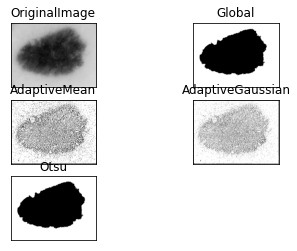

In [2]:
#for the first image in dataset
img = cv.imread("..\datasets\ISIC2017\ISIC-2017_Training_Data\ISIC_0000000.jpg", 0)

img_name = 'ISIC_0000000'
#img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
ret4,th4 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
titles = ['OriginalImage', 'Global',
            'AdaptiveMean', 'AdaptiveGaussian',
            'Otsu']
images = [img, th1, th2, th3, th4]
for i in range(5):
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\'+img_name+'_'+titles[i]+'.jpg', images[i])
plt.show()

For the purpose, either Global and Otsu threshold techniques result in similar results.
Now let's try these two in a more complex image.

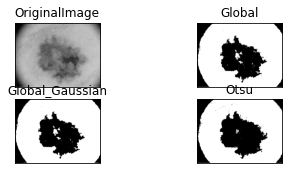

In [3]:
#for the first image in dataset
img_name = 'ISIC_0000002'
img = cv.imread('..\datasets\ISIC2017\ISIC-2017_Training_Data\{}.jpg'.format(img_name), 0)

#img = cv.medianBlur(img,5)
blur = cv.GaussianBlur(img,(5,5),0)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,th2 = cv.threshold(blur,127,255,cv.THRESH_BINARY)
ret2,th3 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th4 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
titles = ['OriginalImage','Global','Global_Gaussian','Otsu','Otsu_Gaussian']
images = [img, th1, th2, th3, th4]
for i in range(4):
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\'+img_name+'_'+titles[i]+'.jpg', images[i])
plt.show()

Global and Otsu Thresholding with Gaussian filter seems to show a fuller object.
Now let's see these two techniques applied in more challenging images.

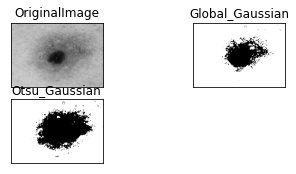

In [4]:
#for the first image in dataset
images_name = ['ISIC_0000004','ISIC_0000030','ISIC_0000031','ISIC_0000032','ISIC_0000049','ISIC_0000050','ISIC_0000071','ISIC_0000074','ISIC_0000091','ISIC_0000095','ISIC_0000099','ISIC_0000127','ISIC_0000146','ISIC_0000150','ISIC_0000166','ISIC_0000002','ISIC_0000179']
for img_name in images_name:
    img = cv.imread('..\datasets\ISIC2017\ISIC-2017_Training_Data\{}.jpg'.format(img_name), 0)

    blur = cv.GaussianBlur(img,(5,5),0)
    ret,th2 = cv.threshold(blur,127,255,cv.THRESH_BINARY)
    ret3,th4 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    titles = ['OriginalImage','Global_Gaussian','Otsu_Gaussian']
    images = [img, th2, th4]
    for i in range(3):
        plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
        cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\'+img_name+'_'+titles[i]+'.jpg', images[i])

Now lets detect the blobs and draw a circle around them

In [5]:
#for the first image in dataset
images_name = ['ISIC_0000004','ISIC_0000030','ISIC_0000031','ISIC_0000032','ISIC_0000049','ISIC_0000050','ISIC_0000071','ISIC_0000074','ISIC_0000091','ISIC_0000095','ISIC_0000099','ISIC_0000127','ISIC_0000146','ISIC_0000150','ISIC_0000166','ISIC_0000002','ISIC_0000179']
for img_name in images_name:
    #img_name = images_name[0]
    img_rgb = cv.imread('..\datasets\ISIC2017\ISIC-2017_Training_Data\{}.jpg'.format(img_name))
    img = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

    blur = cv.blur(img,(10,10),0)
    _,img = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    # apply morphology open then close
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
    blob = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (9,9))
    blob = cv.morphologyEx(blob, cv.MORPH_CLOSE, kernel)
    cnts = cv.findContours(blob, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    #print(cnts)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    big_contour = max(cnts, key=cv.contourArea)
    result = img_rgb.copy()
    cv.drawContours(result, [big_contour], -1, (0,0,255), 2)
    # cv.startWindowThread()
    # plt.imshow(img)
    # plt.imshow(result)
    # cv.waitKey()
    cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\'+img_name+'_Binarized.jpg', result)

In [6]:
#for the first image in dataset
images_name = ['ISIC_0000004','ISIC_0000030','ISIC_0000031','ISIC_0000032','ISIC_0000049','ISIC_0000050','ISIC_0000071','ISIC_0000074','ISIC_0000091','ISIC_0000095','ISIC_0000099','ISIC_0000127','ISIC_0000146','ISIC_0000150','ISIC_0000166','ISIC_0000002','ISIC_0000179']
for img_name in images_name:
    #img_name = images_name[0]
    img_rgb = cv.imread('..\datasets\ISIC2017\ISIC-2017_Training_Data\{}.jpg'.format(img_name))
    img = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

    img = cv.blur(img,(5,5),0)
    img = cv.blur(img,(10,10),0)
    _,img = cv.threshold(img,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    img = cv.erode(img,(3,3),iterations=2)
    img = cv.dilate(img,(3,3),iterations=2)
    cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\'+img_name+'.jpg', img_rgb)
    cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\'+img_name+'_'+'Binarized.jpg', img)

1.1 Teste: tentar fazer com que as bordas pretas fiquem brancas e binarizar a image a partir disso

In [7]:
images_name = ['ISIC_0000004','ISIC_0000043','ISIC_0011144','ISIC_0000147','ISIC_0000030','ISIC_0000031','ISIC_0000032','ISIC_0000049','ISIC_0000050','ISIC_0000071','ISIC_0000074','ISIC_0000091','ISIC_0000095','ISIC_0000099','ISIC_0000127','ISIC_0000146','ISIC_0000150','ISIC_0000166','ISIC_0000002','ISIC_0000179']
for img_name in images_name:
    img_rgb = cv.imread('..\datasets\ISIC2017\ISIC-2017_Training_Data\{}.jpg'.format(img_name))
    img = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
    img = cv.blur(img,(10,10),0)
    _,img_thresh = cv.threshold(img,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    kernel = np.ones((10,10),np.uint8)
    img_erode = cv.erode(img_thresh,kernel,iterations = 1)
    img = img_erode.copy()
    y, x = img.shape

    corners = {
        'top_left': {
            'x': [0,50],
            'y': [0,50]
        },
        'top_right': {
            'x': [0,50],
            'y': [y - 51, y-1]
        },
        'bottom_left': {
            'x': [x - 51, x-1],
            'y': [0,50]
        },
        'bottom_right': {
            'x': [x - 51, x-1],
            'y': [y - 51, y-1]
        },
    }
    for position in corners:
        for x in range(corners[position]['x'][0], corners[position]['x'][1]):
            for y in range(corners[position]['y'][0], corners[position]['y'][1]):
                if img[y,x] == 255:
                    cv.floodFill(img, None, (x,y), 0)

    
    cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\'+img_name+'.jpg', img_rgb)
    cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\'+img_name+'_erode.jpg', img_erode)
    cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\'+img_name+'_thresh.jpg', img_thresh)
    cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\'+img_name+'_test.jpg', img)



Teste 1.2: Aplicando threshold em cada um dos 3 canais
Objetivo: Verificar se é vantajoso o uso de um canal específico para fazer threshold

In [8]:
img_rgb = cv.imread('..\datasets\ISIC2017\ISIC-2017_Training_Data\ISIC_0000030.jpg')
cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\teste1.1\ISIC_0000030_B.jpg', img_rgb[:,:,0])
cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\teste1.1\ISIC_0000030_G.jpg', img_rgb[:,:,1])
cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\\teste1.1\ISIC_0000030_R.jpg', img_rgb[:,:,2])
    

False

Teste 1.2: Como o azul parece ser o canal que mais traz informações sobre a lesão, vamos utilizar esse, somando a imagem binarizada a partir da escala de cinza com a imagem binarizada do canal azul.

No mesmo código, adicionamos uma parte para remover pequenos spots denecessários da imagem

In [9]:
images_name = ['ISIC_0000004','ISIC_0000043','ISIC_0011144','ISIC_0000147','ISIC_0000030','ISIC_0000031','ISIC_0000032','ISIC_0000049','ISIC_0000050','ISIC_0000071','ISIC_0000074','ISIC_0000091','ISIC_0000095','ISIC_0000099','ISIC_0000127','ISIC_0000146','ISIC_0000150','ISIC_0000166','ISIC_0000002','ISIC_0000179']
for img_name in images_name:
    img_rgb = cv.imread('..\datasets\ISIC2017\ISIC-2017_Training_Data\{}.jpg'.format(img_name))
    img = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
    img = cv.GaussianBlur(img,(5,5),0)
    _,img = cv.threshold(img,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    kernel = np.ones((10,10),np.uint8)
    img = cv.erode(img,kernel,iterations = 1) # método para remover os pelos

    img_blue = img_rgb[:,:,0]
    img_blue = cv.GaussianBlur(img_blue,(11,11),0)
    _,img_blue = cv.threshold(img_blue,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    kernel = np.ones((10,10),np.uint8)
    img_blue = cv.erode(img_blue,kernel,iterations = 1)
    
    y, x = img.shape

    corners = {
        'top_left': {
            'x': [0,10],
            'y': [0,10]
        },
        'top_right': {
            'x': [0,10],
            'y': [y - 11, y-1]
        },
        'bottom_left': {
            'x': [x - 11, x-1],
            'y': [0,10]
        },
        'bottom_right': {
            'x': [x - 11, x-1],
            'y': [y - 11, y-1]
        },
    }

    count = 0
    
    # remove white corners from image
    for position in corners:
        for x in range(corners[position]['x'][0], corners[position]['x'][1]):
            for y in range(corners[position]['y'][0], corners[position]['y'][1]):
                if img[y,x] >= 255:
                    cv.floodFill(img, None, (x,y), 0)
                if img_blue[y,x] >= 255:
                    cv.floodFill(img_blue, None, (x,y), 0)
    
    img_sum = img + img_blue
    img_sum[img_sum > 125] = 255
    img_sum[img_sum < 125] = 0

    #remove minimal blobs white from images
    contours, _ = cv.findContours(img_sum, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    img_final = np.zeros_like(img_sum)
    for contour in contours:
        area = cv.contourArea(contour)
        if area > 5000:
            cv.fillPoly(img_final, [contour], 255)

    
    img_final = cv.dilate(img_final,kernel,iterations = 1)

    cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\methods_comparison\\'+img_name+'_method1.5.jpg', img_final)

Agora podemos obter os contornos e traçar retangulos ao redor das imagens.

In [10]:
images_name = ['ISIC_0000002','ISIC_0000004','ISIC_0000043','ISIC_0011144','ISIC_0000147','ISIC_0000030','ISIC_0000031','ISIC_0000032','ISIC_0000049','ISIC_0000050','ISIC_0000071','ISIC_0000074','ISIC_0000091','ISIC_0000095','ISIC_0000099','ISIC_0000127','ISIC_0000146','ISIC_0000150','ISIC_0000166','ISIC_0000179']
for img_name in images_name:
    img_rgb = cv.imread('..\datasets\ISIC2017\ISIC-2017_Training_Data\{}.jpg'.format(img_name))
    img = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
    img = cv.GaussianBlur(img,(5,5),0)
    _,img = cv.threshold(img,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    kernel = np.ones((10,10),np.uint8)
    img = cv.erode(img,kernel,iterations = 1) 

    img_blue = img_rgb[:,:,0]
    img_blue = cv.GaussianBlur(img_blue,(11,11),0)
    _,img_blue = cv.threshold(img_blue,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    kernel = np.ones((10,10),np.uint8)
    img_blue = cv.erode(img_blue,kernel,iterations = 1)
    
    y, x = img.shape

    corners = {
        'top_left': {
            'x': [0,10],
            'y': [0,10]
        },
        'top_right': {
            'x': [0,10],
            'y': [y - 11, y-1]
        },
        'bottom_left': {
            'x': [x - 11, x-1],
            'y': [0,10]
        },
        'bottom_right': {
            'x': [x - 11, x-1],
            'y': [y - 11, y-1]
        },
    }

    count = 0
    
    # remove white corners from image
    for position in corners:
        for x in range(corners[position]['x'][0], corners[position]['x'][1]):
            for y in range(corners[position]['y'][0], corners[position]['y'][1]):
                if img[y,x] >= 255:
                    cv.floodFill(img, None, (x,y), 0)
                if img_blue[y,x] >= 255:
                    cv.floodFill(img_blue, None, (x,y), 0)
    
    img_sum = img + img_blue
    img_sum[img_sum > 125] = 255
    img_sum[img_sum < 125] = 0

    #remove minimal white blobs from images
    contours, _ = cv.findContours(img_sum, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    img_clean = np.zeros_like(img_sum)
    for contour in contours:
        area = cv.contourArea(contour)
        if area > 5000:
            cv.fillPoly(img_clean, [contour], 255)

    
    img_clean = cv.dilate(img_clean,kernel,iterations = 1)

    contours, _ = cv.findContours(img_clean,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
    
    t, b, r, l = [-1, 10000, -1, 10000]
    
    for points in contours:
        for p in points:
            if t < p[0][1]:
                t = p[0][1]
            if b > p[0][1]:
                b = p[0][1]
            if l > p[0][0]:
                l = p[0][0]
            if r < p[0][0]:
                r = p[0][0]

    b = b - 100 if b - 100 > -1 else 0
    t = t + 100 if t + 100 < y else y
    l = l - 100 if l - 100 > -1 else 0
    r = r + 100 if r + 100 < x else x
    
    print(str(t), str(b), str(r), str(l))
                
    img_final = cv.rectangle(img_rgb, (l,b), (r,t), (255, 0, 0), 1)

    cv.imwrite('..\datasets\ISIC2017\\thresholding_experiments\methods_comparison\\'+img_name+'_method1.5.jpg', img_final)

765 44 949 167
99 9900 99 9900
1127 0 1331 36
746 90 809 146
1534 0 1945 232
793 0 1374 164
1092 92 1271 279
1127 8 1502 286
1127 0 1413 109
992 99 1426 219
554 169 519 192
708 0 1010 0
1319 236 1984 106
1208 0 2046 255
1392 215 1830 132
1106 218 1134 121
1410 68 1742 308
1409 172 1768 212
499 0 709 31
1025 63 1428 201
